In [1]:
#1“cd” and “datetime”

In [2]:
cd

/Users/pragathi


In [3]:
import datetime
print(datetime.datetime.now())

2024-11-26 08:08:24.653839


In [4]:
#2.importing libraries
import pandas as pd
import wrds

In [5]:
#3.connecting WRDS using your ID and password
conn=wrds.Connection()

Enter your WRDS username [pragathi]: pragathi06
Enter your password: ········


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  n


You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [6]:
#4.download the company basic info data- columns including 'siccd', 'permno,' 'ticker','comnam', 'cusip', and 'namedt'
info_crsp=conn.get_table(library='crsp', table='stocknames', columns =['siccd', 'permno', 'ticker','comnam', 'cusip','namedt'])

In [7]:
info_crsp

,siccd,permno,ticker,comnam,cusip,namedt
0,3990,10000,OMFGA,OPTIMUM MANUFACTURING INC,68391610,1986-01-07
1,4920,10001,GFGC,GREAT FALLS GAS CO,36720410,1986-01-09
2,4920,10001,EWST,ENERGY WEST INC,36720410,1993-11-22
3,4920,10001,EWST,ENERGY WEST INC,36720410,2008-02-05
4,4920,10001,EGAS,ENERGY INC,36720410,2009-08-04
...,...,...,...,...,...,...
80785,9999,93433,VLTC,VOLTARI CORP,92870X30,2013-04-24
80786,9999,93434,SANW,S & W SEED CO,78513510,2010-06-14
80787,6163,93435,SCEI,SINO CLEAN ENERGY INC,82936G20,2010-06-14
80788,9999,93436,TSLA,TESLA MOTORS INC,88160R10,2010-06-29


In [8]:
#5.change the format of 'namedt' to Panda’s date format
info_crsp['namedt']= pd.to_datetime(info_crsp['namedt'])
info_crsp

,siccd,permno,ticker,comnam,cusip,namedt
0,3990,10000,OMFGA,OPTIMUM MANUFACTURING INC,68391610,1986-01-07
1,4920,10001,GFGC,GREAT FALLS GAS CO,36720410,1986-01-09
2,4920,10001,EWST,ENERGY WEST INC,36720410,1993-11-22
3,4920,10001,EWST,ENERGY WEST INC,36720410,2008-02-05
4,4920,10001,EGAS,ENERGY INC,36720410,2009-08-04
...,...,...,...,...,...,...
80785,9999,93433,VLTC,VOLTARI CORP,92870X30,2013-04-24
80786,9999,93434,SANW,S & W SEED CO,78513510,2010-06-14
80787,6163,93435,SCEI,SINO CLEAN ENERGY INC,82936G20,2010-06-14
80788,9999,93436,TSLA,TESLA MOTORS INC,88160R10,2010-06-29


In [9]:
info_crsp['namedt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 80790 entries, 0 to 80789
Series name: namedt
Non-Null Count  Dtype         
--------------  -----         
80790 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 631.3 KB


In [10]:
#6. (print screen; a print screen file should be pasted in your PDF file) using ONE Pandas function, show the information of the data including the list of columns, data types of columns, the number of rows, memory etc. 
#(hint: check in-class8 the last question you solved)
info_crsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80790 entries, 0 to 80789
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   siccd   80790 non-null  int64         
 1   permno  80790 non-null  int64         
 2   ticker  75849 non-null  object        
 3   comnam  80790 non-null  object        
 4   cusip   80790 non-null  object        
 5   namedt  80790 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 3.7+ MB


In [11]:
#7.check duplicates based on 'permno’  (i.e., count the total number of duplicates)
info_crsp.duplicated('permno').value_counts()

True     43014
False    37776
Name: count, dtype: int64

In [12]:
#8.sort the data based on 'permno’ and 'namedt' (hint: sort_values())
info_crsp = info_crsp.sort_values(by=['permno', 'namedt'])
info_crsp

,siccd,permno,ticker,comnam,cusip,namedt
0,3990,10000,OMFGA,OPTIMUM MANUFACTURING INC,68391610,1986-01-07
1,4920,10001,GFGC,GREAT FALLS GAS CO,36720410,1986-01-09
2,4920,10001,EWST,ENERGY WEST INC,36720410,1993-11-22
3,4920,10001,EWST,ENERGY WEST INC,36720410,2008-02-05
4,4920,10001,EGAS,ENERGY INC,36720410,2009-08-04
...,...,...,...,...,...,...
80785,9999,93433,VLTC,VOLTARI CORP,92870X30,2013-04-24
80786,9999,93434,SANW,S & W SEED CO,78513510,2010-06-14
80787,6163,93435,SCEI,SINO CLEAN ENERGY INC,82936G20,2010-06-14
80788,9999,93436,TSLA,TESLA MOTORS INC,88160R10,2010-06-29


In [13]:
#9. Keep only the last one if there are duplicates based on 'permno’
info_crsp=info_crsp.drop_duplicates('permno',keep='last')
info_crsp

,siccd,permno,ticker,comnam,cusip,namedt
0,3990,10000,OMFGA,OPTIMUM MANUFACTURING INC,68391610,1986-01-07
6,4925,10001,EGAS,GAS NATURAL INC,36720410,2010-07-09
10,6020,10002,BTFG,BANCTRUST FINANCIAL GROUP INC,05978R10,2002-05-15
12,6020,10003,GCBK,GREAT COUNTRY BK ASONIA CT,39031810,1987-04-01
13,5330,10004,CLSO,CLOSE OUTS PLUS INC,18906310,1986-01-15
...,...,...,...,...,...,...
80782,7389,93432,JGBO,JIANGBO PHARMACEUTICALS INC,47737R10,2010-06-08
80785,9999,93433,VLTC,VOLTARI CORP,92870X30,2013-04-24
80786,9999,93434,SANW,S & W SEED CO,78513510,2010-06-14
80787,6163,93435,SCEI,SINO CLEAN ENERGY INC,82936G20,2010-06-14


In [14]:
#10.check again if there are duplicates based on all columns
info_crsp.duplicated('permno').value_counts()

False    37776
Name: count, dtype: int64

In [15]:
#11.(print screen) using ONE Pandas function, show the information of the data, including the list of columns, data types of columns, 
#the number of rows, memory, etc. (note: the data from question 6 is BEFORE you delete duplicates, and this data is AFTER you delete duplicates)

In [16]:
info_crsp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37776 entries, 0 to 80789
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   siccd   37776 non-null  int64         
 1   permno  37776 non-null  int64         
 2   ticker  36763 non-null  object        
 3   comnam  37776 non-null  object        
 4   cusip   37776 non-null  object        
 5   namedt  37776 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.0+ MB


In [17]:
#12.(print screen) Show the unique number of companies (hint: unique(); What is the company indicator?)
unique_companies = info_crsp['permno'].nunique()
unique_companies

37776

In [18]:
#the data collected varies as it collects info of different firms at different time, so it is cross-sectional.
# long format is a way of structuring data where each row represents a single observation for a single variable, and each column represents a variable.
#long format is used in data science and statistical modeling.
# Wide format data is used to organize data where each row represents a unique entity, and each variable or measurement is represented in its own column.
#wide format is used for showcasing a small spreadsheet or data entry
# A format including both “long and wide” is called panel data (cross-sectional time series)

In [19]:
#the data used in cross-sectional here with rows representing different entities at different times. 
#the data containing only many activities of the firm then it is time-series and if it would have contained more entity then it is panel data.
# this is a cross-sectional data.

In [20]:
#1.subset “permno” from the data you created from Part 1.
#Part 2: Export the company basic info data to collect the abnormal return data via WRDS.

crsp_out = info_crsp[['permno']]

In [21]:
#2.add your event date

crsp_out['eventdate'] = '2022-02-24'  

/var/folders/3p/z9wtcy0n5gn8qfr58l89gwsh0000gn/T/ipykernel_43804/1092973538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp_out['eventdate'] = '2022-02-24'


In [22]:
#3.(print screen) Show the top five row of the data
crsp_out.head(5)

,permno,eventdate
0,10000,2022-02-24
6,10001,2022-02-24
10,10002,2022-02-24
12,10003,2022-02-24
13,10004,2022-02-24


In [23]:
#4.export the data to your local computer.

In [24]:
loc=r'C:\Users\Lenovo\Downloads'

In [25]:
fname=loc+'\\Energy_permno_test.txt'

In [26]:
crsp_out.to_csv(fname, header=False, index=False, sep=' ')

In [27]:
#PART-3
#We will be downloading the abnormal return data from WRDS and post the data on WRDS and read it from GitHub

In [28]:
#1.read your file from your GitHub

url='https://github.com/ARIFFKHANAMIR/energy3/blob/main/energry3.csv?raw=True'

In [29]:
abcar=pd.read_csv(url)
abcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      8800 non-null   object 
 1   permno     8800 non-null   int64  
 2   evtdate    8800 non-null   object 
 3   cret       8799 non-null   float64
 4   car        8799 non-null   float64
 5   bhar       8799 non-null   float64
 6   nrets      8800 non-null   int64  
 7   nrets_est  8800 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 550.1+ KB


In [30]:
#2.(print screen) show the first five row of the data
abcar.head(5)

,Model,permno,evtdate,cret,car,bhar,nrets,nrets_est
0,Market-Adjusted Model,10026,2022-02-24,-0.017184,0.042059,0.040689,21,100
1,Market-Adjusted Model,10028,2022-02-24,0.012136,0.069834,0.070009,21,100
2,Market-Adjusted Model,10032,2022-02-24,0.047353,0.105853,0.105226,21,100
3,Market-Adjusted Model,10044,2022-02-24,-0.069034,-0.010399,-0.011161,21,100
4,Market-Adjusted Model,10051,2022-02-24,0.115951,0.171434,0.173823,21,100


In [31]:
# this represent a cross-sectional data as it reperesent a multiple entities at specific time.

In [32]:
#now we check for duplicates and nunique companies using permno value

In [33]:
#3.check duplicates using “permno”
abcar.duplicated(['permno'])

0       False
1       False
2       False
3       False
4       False
        ...  
8795    False
8796    False
8797    False
8798    False
8799    False
Length: 8800, dtype: bool

In [34]:
abcar.duplicated('permno').value_counts()

False    8800
Name: count, dtype: int64

In [35]:
#4.(print screen) show the unique number of companies.
abcar['permno'].nunique()

8800

In [36]:
#now we merge info_crsp with abcar using inner merging by permno

In [37]:
crsp = abcar.merge(info_crsp, how="inner", on="permno")
crsp

,Model,permno,evtdate,cret,car,bhar,nrets,nrets_est,siccd,ticker,comnam,cusip,namedt
0,Market-Adjusted Model,10026,2022-02-24,-0.017184,0.042059,0.040689,21,100,2052,JJSF,J & J SNACK FOODS CORP,46603210,2000-08-01
1,Market-Adjusted Model,10028,2022-02-24,0.012136,0.069834,0.070009,21,100,5094,ELA,ENVELA CORP,29402E10,2019-12-18
2,Market-Adjusted Model,10032,2022-02-24,0.047353,0.105853,0.105226,21,100,3670,PLXS,PLEXUS CORP,72913210,1986-02-05
3,Market-Adjusted Model,10044,2022-02-24,-0.069034,-0.010399,-0.011161,21,100,2060,RMCF,ROCKY MOUNTAIN CHOC FAC INC NEW,77467X10,2015-03-02
4,Market-Adjusted Model,10051,2022-02-24,0.115951,0.171434,0.173823,21,100,4813,HNGR,HANGER INC,41043F20,2020-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,Market-Adjusted Model,93426,2022-02-24,-0.023935,0.035815,0.033938,21,100,3676,VPG,VISHAY PRECISION GROUP INC,92835K10,2010-07-07
8796,Market-Adjusted Model,93427,2022-02-24,-0.024695,0.035728,0.033178,21,100,3827,FN,FABRINET,G3323L10,2021-04-28
8797,Market-Adjusted Model,93429,2022-02-24,-0.065287,-0.008288,-0.007414,21,100,7374,CBOE,C B O E GLOBAL MARKETS INC,12503M10,2023-08-11
8798,Market-Adjusted Model,93434,2022-02-24,0.033755,0.096911,0.091628,21,100,9999,SANW,S & W SEED CO,78513510,2010-06-14


In [38]:
abcar.head(5)

,Model,permno,evtdate,cret,car,bhar,nrets,nrets_est
0,Market-Adjusted Model,10026,2022-02-24,-0.017184,0.042059,0.040689,21,100
1,Market-Adjusted Model,10028,2022-02-24,0.012136,0.069834,0.070009,21,100
2,Market-Adjusted Model,10032,2022-02-24,0.047353,0.105853,0.105226,21,100
3,Market-Adjusted Model,10044,2022-02-24,-0.069034,-0.010399,-0.011161,21,100
4,Market-Adjusted Model,10051,2022-02-24,0.115951,0.171434,0.173823,21,100


In [39]:
#(print screen) Using ONE Pandas function, show the data information, including the list of columns, data types of columns, 
# the number of rows, memory, etc.
abcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      8800 non-null   object 
 1   permno     8800 non-null   int64  
 2   evtdate    8800 non-null   object 
 3   cret       8799 non-null   float64
 4   car        8799 non-null   float64
 5   bhar       8799 non-null   float64
 6   nrets      8800 non-null   int64  
 7   nrets_est  8800 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 550.1+ KB


In [40]:
#4.
# the relationship between the data from Part 1 and Part 3 is one-to-one because the permno is being the unique identifier.

In [41]:
#5.
#the merging strategy was used beacuse to get the expected outcome to combine multiple data set from nature of data we used.


In [42]:
#6.
#the classification is consider on we use the data to generate in structured way. 
#if it is time series, then single data is considered at different time patterns
#on the other hand if we use multiple data at multiple time frequencies, it will be panel data
#it depends upon whether the data included entities at one point or multiple entities considered in a time period.

In [43]:
# collecting compustat data

comp = conn.raw_sql('''select sich, gvkey, datadate, conm, revt, ni from comp.funda 
                        where datafmt = 'STD' and consol = 'C'and indfmt = 'INDL'
                        ''', date_cols=['datadate'])
#generating year
comp['year']=pd.DatetimeIndex(comp['datadate']).year

#linkage
url='https://github.com/kyoon5/shared/blob/main/link.csv?raw=true'
link=pd.read_csv(url)
link['gvkey'] = link['gvkey'].astype(str).str.zfill(6)
link['linkdt']=pd.to_datetime(link['linkdt'])
link['linkenddt']=pd.to_datetime(link['linkenddt'])

#adding permno for crsp data
comp2 = (
    comp.merge(link, how='inner', on='gvkey')  # Join on gvkey
    .query("datadate >= linkdt and (datadate <= linkenddt or linkenddt.isna())")  # Apply date range filter
    .assign(permno=lambda x: x['lpermno'])  # Select permno
    .sort_values(['gvkey', 'datadate'])  # Sort by gvkey and datadate
)

comp2=comp2[['sich', 'gvkey','datadate','conm','revt','ni','year','permno']]

In [44]:
crsp['year']=pd.DatetimeIndex(crsp['evtdate']).year

In [45]:
crsp_comp=crsp.merge(comp2,how="inner",on=['permno','year'])
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5443 entries, 0 to 5442
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      5443 non-null   object        
 1   permno     5443 non-null   int64         
 2   evtdate    5443 non-null   object        
 3   cret       5442 non-null   float64       
 4   car        5442 non-null   float64       
 5   bhar       5442 non-null   float64       
 6   nrets      5443 non-null   int64         
 7   nrets_est  5443 non-null   int64         
 8   siccd      5443 non-null   int64         
 9   ticker     5443 non-null   object        
 10  comnam     5443 non-null   object        
 11  cusip      5443 non-null   object        
 12  namedt     5443 non-null   datetime64[ns]
 13  year       5443 non-null   int32         
 14  sich       4967 non-null   float64       
 15  gvkey      5443 non-null   object        
 16  datadate   5443 non-null   datetime64[ns]


In [46]:
# We have selected Ariff's Work which is Energy Industry and We have merged the data of Pragathi's Industry Defense. 
#And also our sample sizes are same. From here we have done the work for both the industries accordingly.

In [47]:
import numpy as np

In [48]:
crsp_comp['energy']=np.where((crsp_comp['siccd']>=2910)&(crsp_comp['siccd']<=2911),True,False)

In [49]:
crsp_comp['Defense']=np.where((crsp_comp['siccd']>= 3759)&(crsp_comp['siccd']<=3761),True,False)

In [50]:
crsp_comp['energy'].value_counts()

energy
False    5428
True       15
Name: count, dtype: int64

In [51]:
crsp_comp['Defense'].value_counts()

Defense
False    5440
True        3
Name: count, dtype: int64

In [52]:
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5443 entries, 0 to 5442
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      5443 non-null   object        
 1   permno     5443 non-null   int64         
 2   evtdate    5443 non-null   object        
 3   cret       5442 non-null   float64       
 4   car        5442 non-null   float64       
 5   bhar       5442 non-null   float64       
 6   nrets      5443 non-null   int64         
 7   nrets_est  5443 non-null   int64         
 8   siccd      5443 non-null   int64         
 9   ticker     5443 non-null   object        
 10  comnam     5443 non-null   object        
 11  cusip      5443 non-null   object        
 12  namedt     5443 non-null   datetime64[ns]
 13  year       5443 non-null   int32         
 14  sich       4967 non-null   float64       
 15  gvkey      5443 non-null   object        
 16  datadate   5443 non-null   datetime64[ns]


In [53]:
#Importing Pickle
import pickle

In [54]:
# Save multiple DataFrames in a dictionary
data = {'info_crsp': info_crsp, 'crsp': crsp, 'crsp_comp':crsp_comp}

In [55]:
loc=r"C:\Users\lenovo\Downloads"

In [56]:
# Define the file name and location fname = loc + '\\assignment6.pkl'
fname=loc+'\\assignmentmod-1.pkl'

In [57]:
with open(fname, 'wb') as file: 
    pickle.dump(data, file)
#Post Pickle file in your Github

In [58]:
import joblib
from io import BytesIO
import pickle
import requests # or https

# The website address of your pickle file
url='https://github.com/ARIFFKHANAMIR/Pickle/blob/main/assignmentmod-1.pkl?raw=true'



# Download the pickle file
response = requests.get(url)
response.raise_for_status()  # Ensure the download was successful

# Load the pickle file
data = pickle.loads(response.content)

info_crsp = data['info_crsp']
crsp = data['crsp']
crsp_comp = data['crsp_comp']

In [59]:
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5443 entries, 0 to 5442
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      5443 non-null   object        
 1   permno     5443 non-null   int64         
 2   evtdate    5443 non-null   object        
 3   cret       5442 non-null   float64       
 4   car        5442 non-null   float64       
 5   bhar       5442 non-null   float64       
 6   nrets      5443 non-null   int64         
 7   nrets_est  5443 non-null   int64         
 8   siccd      5443 non-null   int64         
 9   ticker     5443 non-null   object        
 10  comnam     5443 non-null   object        
 11  cusip      5443 non-null   object        
 12  namedt     5443 non-null   datetime64[ns]
 13  year       5443 non-null   int32         
 14  sich       4967 non-null   float64       
 15  gvkey      5443 non-null   object        
 16  datadate   5443 non-null   datetime64[ns]


In [60]:
crsp_comp.describe()

,permno,cret,car,bhar,nrets,nrets_est,siccd,namedt,year,sich,datadate,revt,ni
count,5443.000000,5442.000000,5442.000000,5442.000000,5443.000000,5443.000000,5443.000000,5443,5443.0,4967.000000,5443,5046.000000,5046.000000
mean,46002.168841,-0.025745,0.032284,0.032117,20.996693,99.113908,6583.870660,2016-02-23 03:10:44.864964096,2022.0,4832.920676,2022-11-22 11:59:20.316002304,5551.204957,492.748442
min,10026.000000,-0.871707,-1.144936,-0.813835,12.000000,40.000000,0.000000,1968-01-02 00:00:00,2022.0,100.000000,2022-01-31 00:00:00,-11591.578000,-22819.000000
25%,17147.500000,-0.119025,-0.054139,-0.061152,21.000000,100.000000,3867.000000,2013-11-03 12:00:00,2022.0,2836.000000,2022-12-31 00:00:00,50.595000,-41.305500
50%,21609.000000,-0.041649,0.022612,0.016224,21.000000,100.000000,6722.000000,2019-09-09 00:00:00,2022.0,4700.000000,2022-12-31 00:00:00,439.831000,7.869500
75%,83677.000000,0.030037,0.100030,0.087910,21.000000,100.000000,9999.000000,2021-07-06 00:00:00,2022.0,6552.000000,2022-12-31 00:00:00,2373.881500,189.825000
max,93436.000000,8.351288,5.504272,8.409161,21.000000,100.000000,9999.000000,2023-12-29 00:00:00,2022.0,9997.000000,2022-12-31 00:00:00,569962.000000,99803.000000
std,32741.229190,0.256853,0.226515,0.256876,0.172504,5.938082,2779.034414,NaN,0.0,2027.527855,NaN,23883.935566,3105.174181


In [61]:
crsp_comp[['cret', 'car', 'bhar', 'nrets', 'nrets_est', 'siccd', 'sich', 'revt', 'ni']].describe()

,cret,car,bhar,nrets,nrets_est,siccd,sich,revt,ni
count,5442.000000,5442.000000,5442.000000,5443.000000,5443.000000,5443.000000,4967.000000,5046.000000,5046.000000
mean,-0.025745,0.032284,0.032117,20.996693,99.113908,6583.870660,4832.920676,5551.204957,492.748442
std,0.256853,0.226515,0.256876,0.172504,5.938082,2779.034414,2027.527855,23883.935566,3105.174181
min,-0.871707,-1.144936,-0.813835,12.000000,40.000000,0.000000,100.000000,-11591.578000,-22819.000000
25%,-0.119025,-0.054139,-0.061152,21.000000,100.000000,3867.000000,2836.000000,50.595000,-41.305500
50%,-0.041649,0.022612,0.016224,21.000000,100.000000,6722.000000,4700.000000,439.831000,7.869500
75%,0.030037,0.100030,0.087910,21.000000,100.000000,9999.000000,6552.000000,2373.881500,189.825000
max,8.351288,5.504272,8.409161,21.000000,100.000000,9999.000000,9997.000000,569962.000000,99803.000000


In [62]:
#Checking the count of True and False in the Energy and Defense coloumn

In [63]:
crsp_comp['energy'].value_counts()

energy
False    5428
True       15
Name: count, dtype: int64

In [64]:
crsp_comp['Defense'].value_counts()

Defense
False    5440
True        3
Name: count, dtype: int64

In [65]:
# log transformation
import numpy as np
crsp_comp['norm'] = (1+crsp_comp.revt)/2
crsp_comp['log_revt'] = np.log(crsp_comp['norm'])
crsp_comp.head()

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Model,permno,evtdate,cret,car,bhar,nrets,nrets_est,siccd,ticker,...,sich,gvkey,datadate,conm,revt,ni,energy,Defense,norm,log_revt
0,Market-Adjusted Model,10026,2022-02-24,-0.017184,0.042059,0.040689,21,100,2052,JJSF,...,2050.0,012825,2022-09-30,J & J SNACK FOODS CORP,1380.656,47.235,False,False,690.828,6.537891
1,Market-Adjusted Model,10028,2022-02-24,0.012136,0.069834,0.070009,21,100,5094,ELA,...,5990.0,012096,2022-12-31,ENVELA CORP,182.686,15.689,False,False,91.843,4.520081
2,Market-Adjusted Model,10032,2022-02-24,0.047353,0.105853,0.105226,21,100,3670,PLXS,...,3672.0,012945,2022-09-30,PLEXUS CORP,3811.368,138.243,False,False,1906.184,7.552859
3,Market-Adjusted Model,10044,2022-02-24,-0.069034,-0.010399,-0.011161,21,100,2060,RMCF,...,2060.0,011976,2022-02-28,ROCKY MOUNTAIN CHOC FACT INC,32.342,-0.342,False,False,16.671,2.813671
4,Market-Adjusted Model,10065,2022-02-24,-0.060154,-0.002260,-0.002281,21,100,6722,ADX,...,NaN,001119,2022-12-31,ADAMS DIVERSIFIED EQUITY FD,NaN,NaN,False,False,NaN,NaN


In [66]:
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5443 entries, 0 to 5442
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      5443 non-null   object        
 1   permno     5443 non-null   int64         
 2   evtdate    5443 non-null   object        
 3   cret       5442 non-null   float64       
 4   car        5442 non-null   float64       
 5   bhar       5442 non-null   float64       
 6   nrets      5443 non-null   int64         
 7   nrets_est  5443 non-null   int64         
 8   siccd      5443 non-null   int64         
 9   ticker     5443 non-null   object        
 10  comnam     5443 non-null   object        
 11  cusip      5443 non-null   object        
 12  namedt     5443 non-null   datetime64[ns]
 13  year       5443 non-null   int32         
 14  sich       4967 non-null   float64       
 15  gvkey      5443 non-null   object        
 16  datadate   5443 non-null   datetime64[ns]


**Trend of Revenue**

In [68]:
#Comparing interested industry vs. all other regarding “car” and "revt"

In [69]:
comparison=crsp_comp[['revt','car','energy']]
comparison=comparison.groupby('energy')[['revt','car']].mean()

comparison

,revt,car
energy,,
False,5241.289998,0.032000
True,109496.682267,0.135134


In [70]:
comparison1=crsp_comp[['revt','car','Defense']]
comparison1=comparison1.groupby('Defense')[['revt','car']].mean()

comparison1

,revt,car
Defense,,
False,5541.390996,0.032220
True,22048.472667,0.148042


In [71]:
comparison = pd.DataFrame({
    'energy':['other industries','energy industries'],
    'revt':[5241.289998,109496.682267],
    'car': [0.032000,0.135134]
}).set_index('energy')

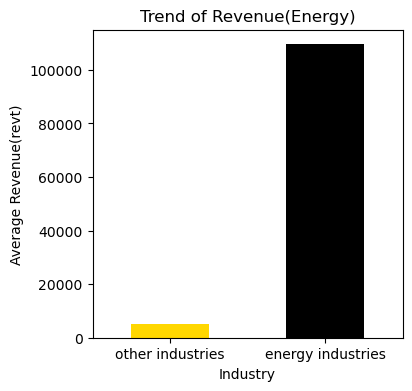

In [72]:
import matplotlib.pyplot as plt

comparison['revt'].plot(kind='bar', color=['gold','black'],figsize=(4,4))
plt.title("Trend of Revenue(Energy)")
plt.xlabel("Industry")
plt.ylabel("Average Revenue(revt)")
plt.xticks(rotation=0)
plt.show()

In [73]:
comparison1 = pd.DataFrame({
    'Defense':['other industries','Defense industries'],
    'revt':[5541.390996,22048.472667],
    'car': [0.032220,0.148042]
}).set_index('Defense')

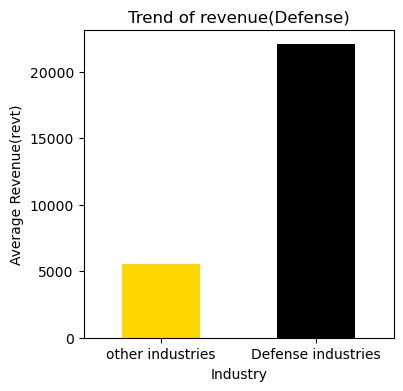

In [74]:
comparison1['revt'].plot(kind='bar', color=['gold','black'],figsize=(4,4))
plt.title("Trend of revenue(Defense)")
plt.xlabel("Industry")
plt.ylabel("Average Revenue(revt)")
plt.xticks(rotation=0)
plt.show()

**Trend of Car**

In [76]:
#Comparing Energy Industry by CAR with other Industries

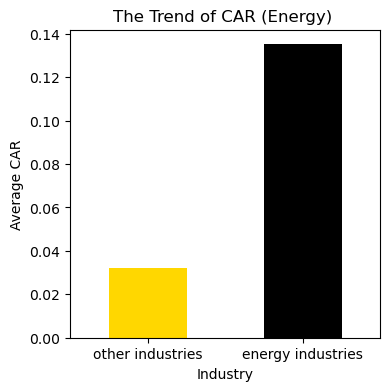

In [77]:
comparison['car'].plot(kind='bar', color=['gold', 'black'], figsize=(4, 4))
plt.title("The Trend of CAR (Energy) ")
plt.xlabel("Industry")
plt.ylabel("Average CAR")
plt.xticks(rotation=0)
plt.show()

In [78]:
#Comparing Defense Industry by CAR with other Industries

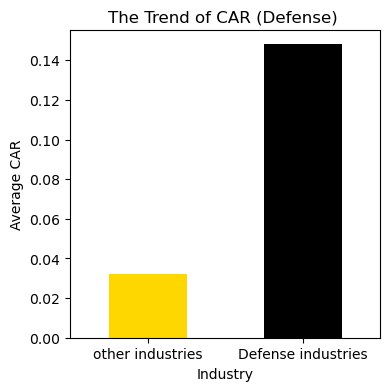

In [79]:
comparison1['car'].plot(kind='bar', color=['gold', 'black'], figsize=(4, 4))
plt.title("The Trend of CAR (Defense) ")
plt.xlabel("Industry")
plt.ylabel("Average CAR")
plt.xticks(rotation=0)
plt.show()

**CORRELATION**

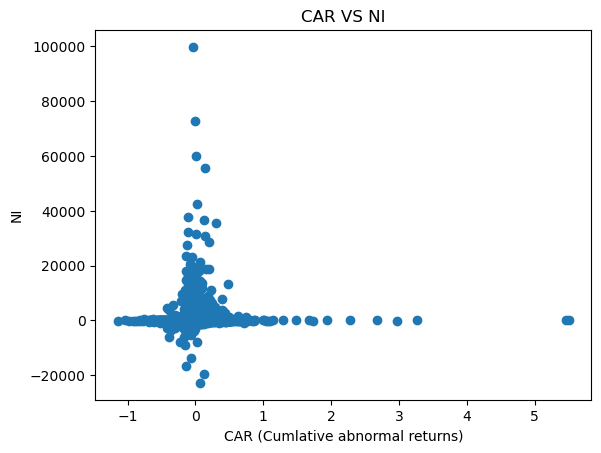

In [81]:
#Analysing the correlation between CAR and other control variables
plt.scatter(crsp_comp['car'],crsp_comp['ni'])
plt.xlabel('CAR (Cumlative abnormal returns)')
plt.ylabel('NI')
plt.title('CAR VS NI')
plt.show()

**REGRESSION**

In [83]:
#Regression analysis with "ni"

In [84]:
import statsmodels.formula.api as smf

model = smf.ols(formula='ni ~ energy', data=crsp_comp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.79e-33
Time:                        08:08:50   Log-Likelihood:                -47661.
No. Observations:                5046   AIC:                         9.533e+04
Df Residuals:                    5044   BIC:                         9.534e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        464.2582     43.160     10.

In [85]:
model = smf.ols(formula='ni ~ Defense', data=crsp_comp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5856
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.444
Time:                        08:08:50   Log-Likelihood:                -47733.
No. Observations:                5046   AIC:                         9.547e+04
Df Residuals:                    5044   BIC:                         9.548e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         491.9325     43.728     

In [86]:
#Analysing the regression relationship between 'bhar', 'energy' and 'log_revt'

In [87]:
model = smf.ols(formula='bhar ~ energy+log_revt', data=crsp_comp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   bhar   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.683
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.186
Time:                        08:08:50   Log-Likelihood:                -484.40
No. Observations:                5031   AIC:                             974.8
Df Residuals:                    5028   BIC:                             994.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0407      0.008      5.

In [88]:
#Analysing the regression relationship between 'bhar', 'Defense' and 'log_revt'
model = smf.ols(formula='bhar ~ Defense+log_revt', data=crsp_comp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   bhar   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7303
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.482
Time:                        08:08:50   Log-Likelihood:                -485.35
No. Observations:                5031   AIC:                             976.7
Df Residuals:                    5028   BIC:                             996.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0400      0.007     

In [89]:
#Regression Analysis using "car", “log_revt”, and industry dummies

In [90]:
crsp_comp['sic2'] = (crsp_comp['siccd']/100).astype(int)
model=smf.ols(formula='car~energy+C(sic2)+log_revt',data=crsp_comp)

In [91]:
import numpy as np
crsp_comp = crsp_comp.dropna()  
crsp_comp = crsp_comp.replace([np.inf, -np.inf], np.nan).dropna()  
crsp_comp['sic2'] = ((crsp_comp['siccd'] / 100).astype(int) + 1e-6)
model = smf.ols(formula='car ~ energy + C(sic2) + log_revt', data=crsp_comp)

In [92]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    car   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     8.213
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           6.07e-79
Time:                        08:08:51   Log-Likelihood:                 433.15
No. Observations:                4942   AIC:                            -716.3
Df Residuals:                    4867   BIC:                            -228.4
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1043 

In [93]:
crsp_comp['sic2'] = (crsp_comp['siccd']/100).astype(int)
model=smf.ols(formula='car~Defense+C(sic2)+log_revt',data=crsp_comp)

In [94]:
crsp_comp = crsp_comp.dropna()  
crsp_comp = crsp_comp.replace([np.inf, -np.inf], np.nan).dropna()  
crsp_comp['sic2'] = ((crsp_comp['siccd'] / 100).astype(int) + 1e-6)
model = smf.ols(formula='car ~ Defense + C(sic2) + log_revt', data=crsp_comp)

In [95]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    car   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     8.197
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           9.42e-79
Time:                        08:08:51   Log-Likelihood:                 432.64
No. Observations:                4942   AIC:                            -715.3
Df Residuals:                    4867   BIC:                            -227.4
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1040 

In [96]:
#Filtering profitable companies and fitting an OLS regression model to examine the impact of energy and log_revt on car.

In [97]:
crsp_comp_profit=crsp_comp[(crsp_comp['ni']>=0)]

In [98]:
model = smf.ols(formula='car ~ energy+log_revt', data=crsp_comp_profit)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    car   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     26.42
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           4.31e-12
Time:                        08:08:51   Log-Likelihood:                 1192.6
No. Observations:                2713   AIC:                            -2379.
Df Residuals:                    2710   BIC:                            -2361.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1104      0.010     11.

In [99]:
model = smf.ols(formula='car ~ Defense+log_revt', data=crsp_comp_profit)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    car   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.33
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.40e-10
Time:                        08:08:51   Log-Likelihood:                 1188.5
No. Observations:                2713   AIC:                            -2371.
Df Residuals:                    2710   BIC:                            -2353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1084      0.010     

In [200]:
#   Pickle File Github Link
#   URL=https://github.com/ARIFFKHANAMIR/Pickle/blob/main/assignmentmod-1.pkl